In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
manhattan_data = pd.read_csv(f'lab2_input_data/rollingsales_manhattan.csv')
staten_island_data = pd.read_csv(f'lab2_input_data/rollingsales_statenisland.csv')
brooklyn_data = pd.read_csv(f'lab2_input_data/rollingsales_brooklyn.csv')
queens_data = pd.read_csv(f'lab2_input_data/rollingsales_queens.csv')

In [3]:
all_data = pd.concat([brooklyn_data, manhattan_data, queens_data, staten_island_data])

print(all_data.head())

   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6360   
1        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6360   
2        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6362   
3        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6367   
4        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6367   

   LOT  EASEMENT BUILDING CLASS AT PRESENT             ADDRESS  \
0   56       NaN                        A5  30 BAY 10TH STREET   
1   68       NaN                        A5  58 BAY 10TH STREET   
2   23       NaN                        A9  43 BAY 11TH STREET   
3   42       NaN                        S1    1730 86TH STREET   
4   43       NaN                        S1    1732 86TH STREET   

  APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS TOTAL UNITS  \
0              NaN  ...                1.0    

In [4]:
print(all_data.dtypes)

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASEMENT                          float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object


Очищення даних
- Перетворення числових стовпців 'SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET' з рядкового формату в числовий
- Очищення від дублікатів
- Очищення від відсутніх значень
- Форматування дати

In [5]:
cols_to_convert = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for array in [all_data, queens_data, manhattan_data, brooklyn_data, staten_island_data] : 
    # Очищення для всього набору даних
    for col in cols_to_convert:
        array[col] = array[col].str.replace(',', '').astype(float)
    
    # Очищення від дублікатів для всього набору даних
    array.drop_duplicates(inplace=True)
    
    # Очищення від відсутніх значень для всього набору даних
    array.dropna(subset=cols_to_convert, inplace=True)
    
    # Форматування дати для всього набору даних
    array['SALE DATE'] = pd.to_datetime(array['SALE DATE'], errors='coerce')

# Перевірка результатів для всього набору даних
print(all_data.head())
print(all_data.dtypes)

   BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6360   
1        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6360   
2        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6362   
3        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6367   
4        3   BATH BEACH  01 ONE FAMILY DWELLINGS                    1   6367   

   LOT  EASEMENT BUILDING CLASS AT PRESENT             ADDRESS  \
0   56       NaN                        A5  30 BAY 10TH STREET   
1   68       NaN                        A5  58 BAY 10TH STREET   
2   23       NaN                        A9  43 BAY 11TH STREET   
3   42       NaN                        S1    1730 86TH STREET   
4   43       NaN                        S1    1732 86TH STREET   

  APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS TOTAL UNITS  \
0              NaN  ...                1.0    

Розподілу цін на житло за кожний район

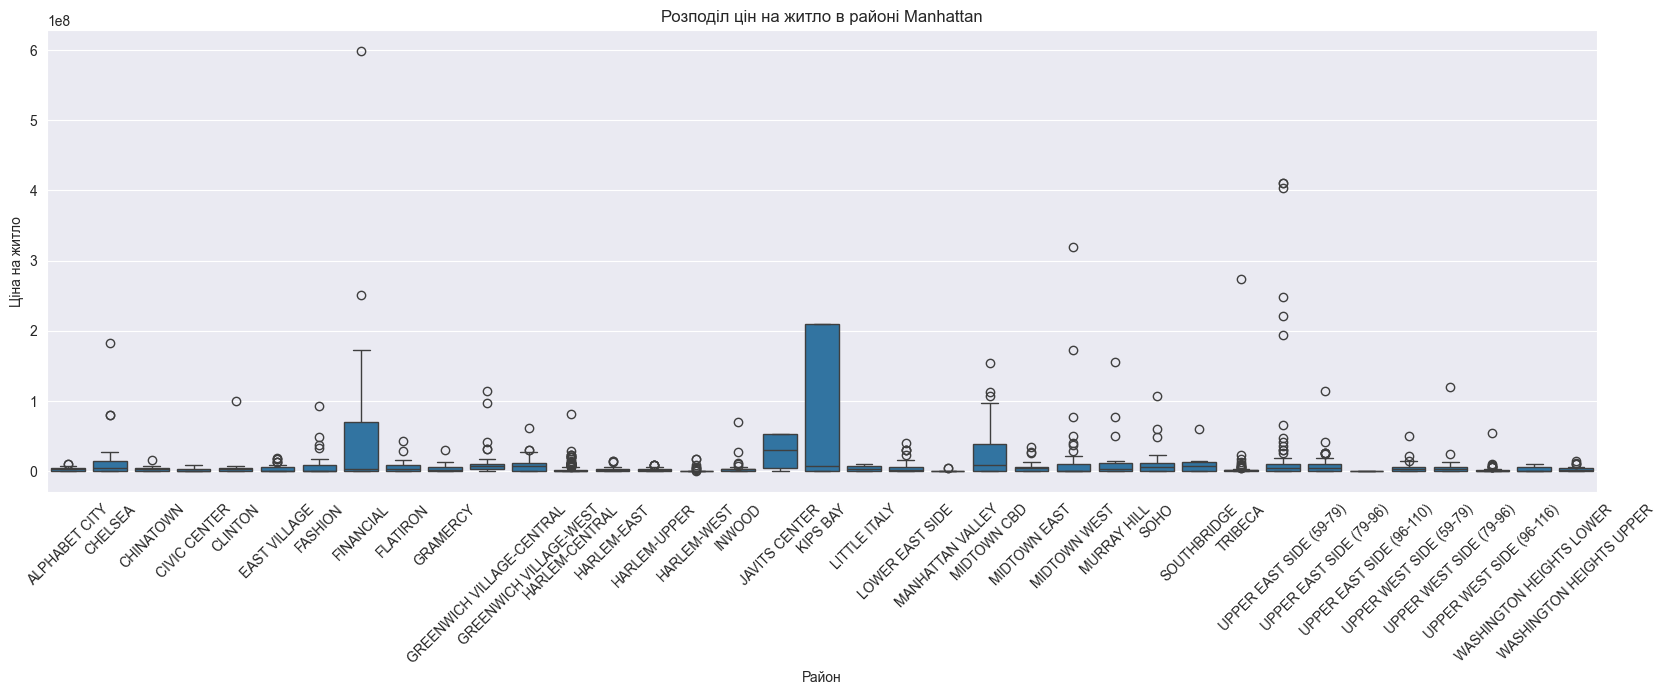

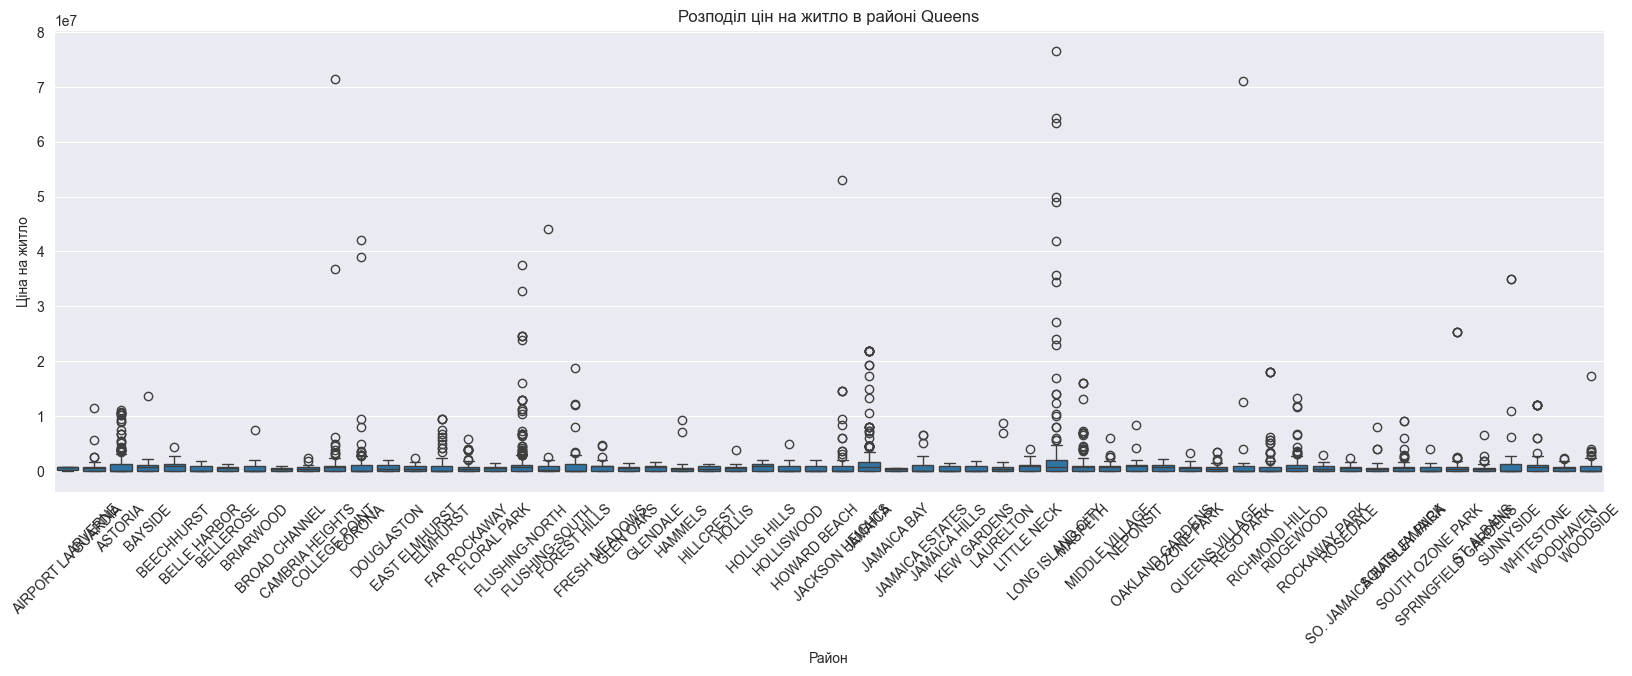

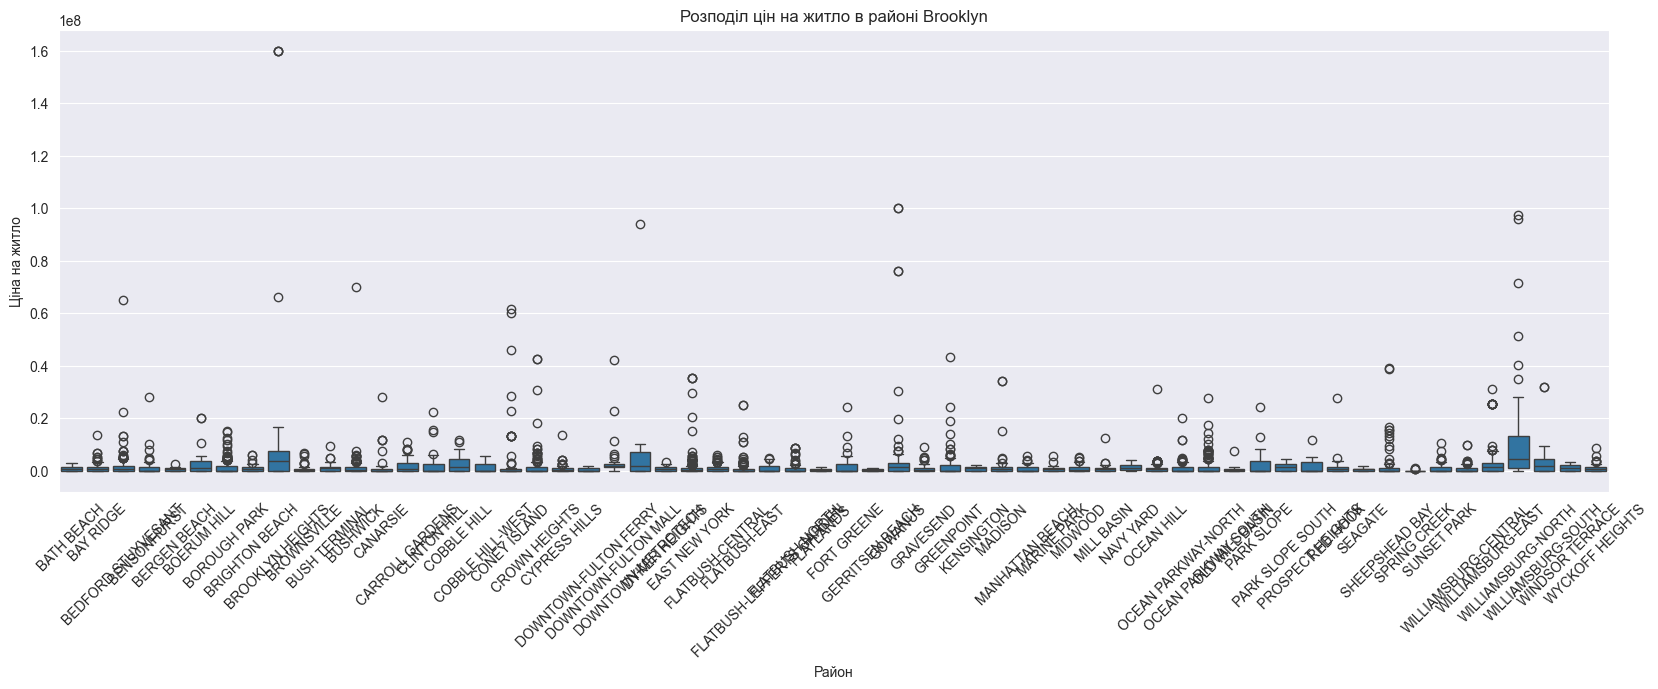

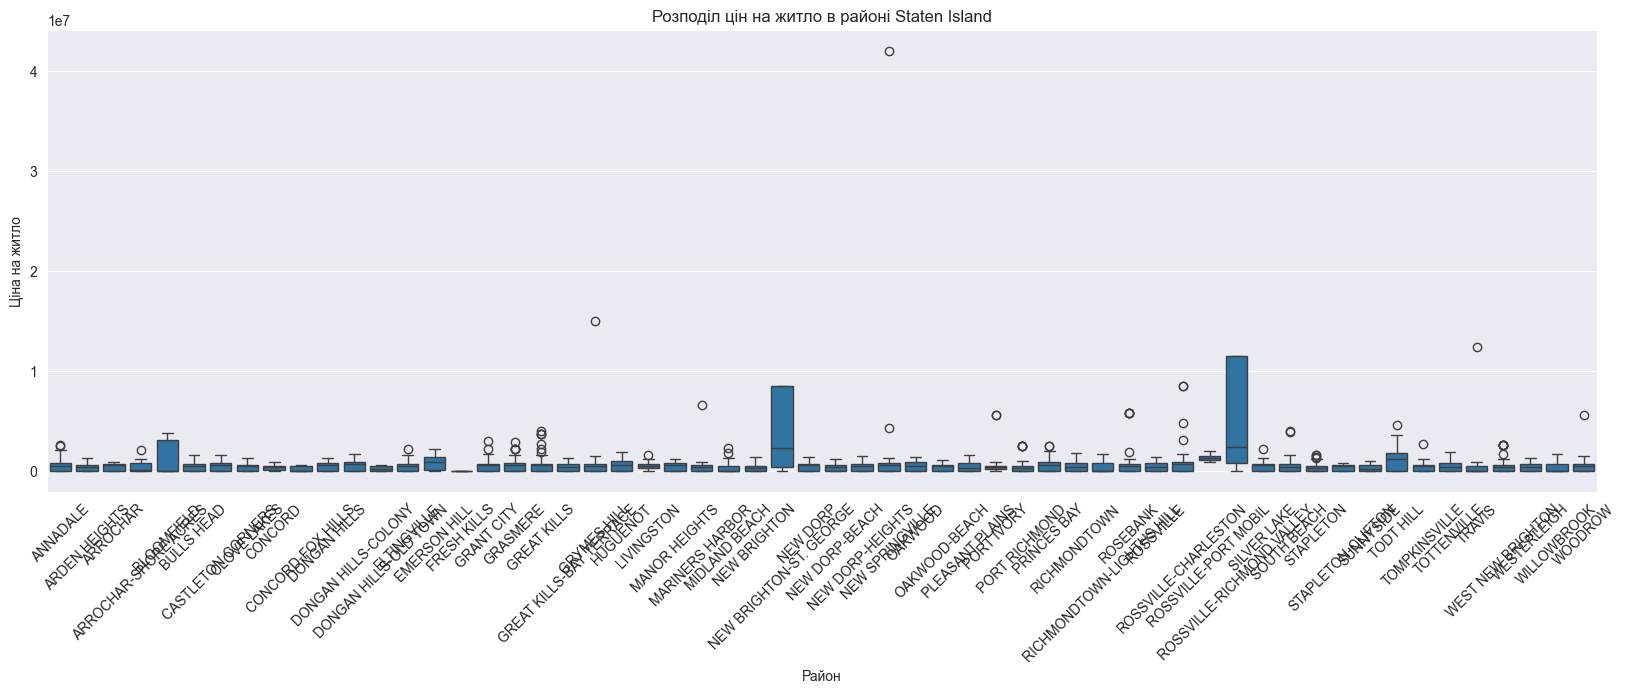

In [6]:
neighborhood_data = [manhattan_data, queens_data, brooklyn_data, staten_island_data]
neighborhood_names = ['Manhattan', 'Queens', 'Brooklyn', 'Staten Island']

for data, name in zip(neighborhood_data, neighborhood_names):
    plt.figure(figsize=(20, 6))
    sb.boxplot(x='NEIGHBORHOOD', y='SALE PRICE', data=data)
    plt.xticks(rotation=45)
    plt.title(f'Розподіл цін на житло в районі {name}')
    plt.xlabel('Район')
    plt.ylabel('Ціна на житло')
    plt.show()

Відповідно цим графікам, можемо бачити що найдорожжчим районом є Manhattan, а саме Javits Center та Staten Island Rossville-Charleston

Взаємозв'язок між ціною на житло та роком побудови

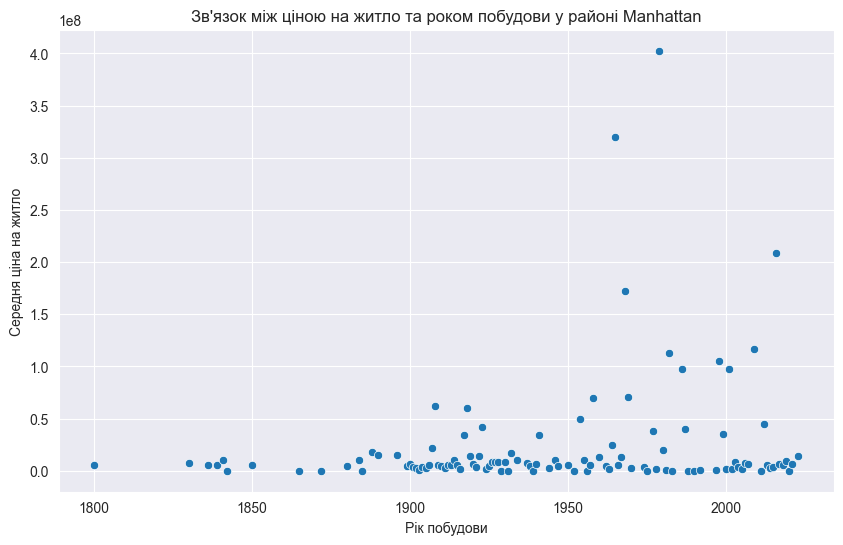

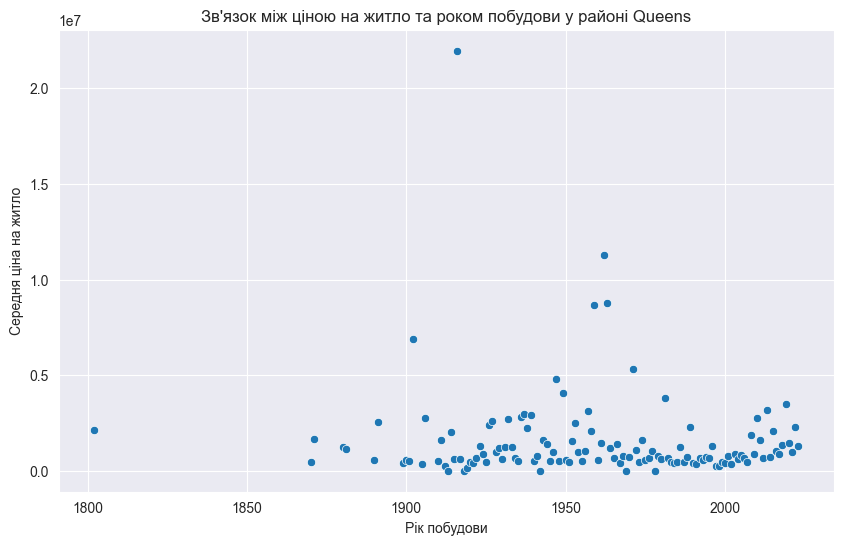

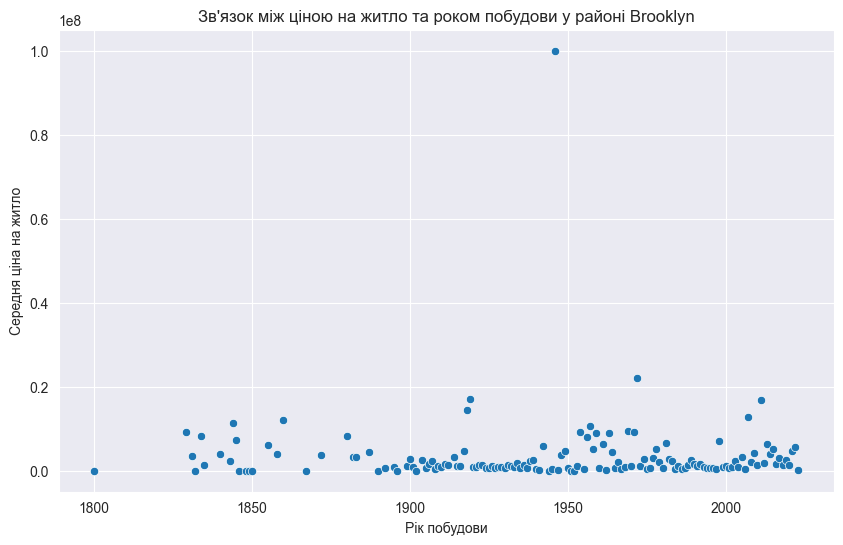

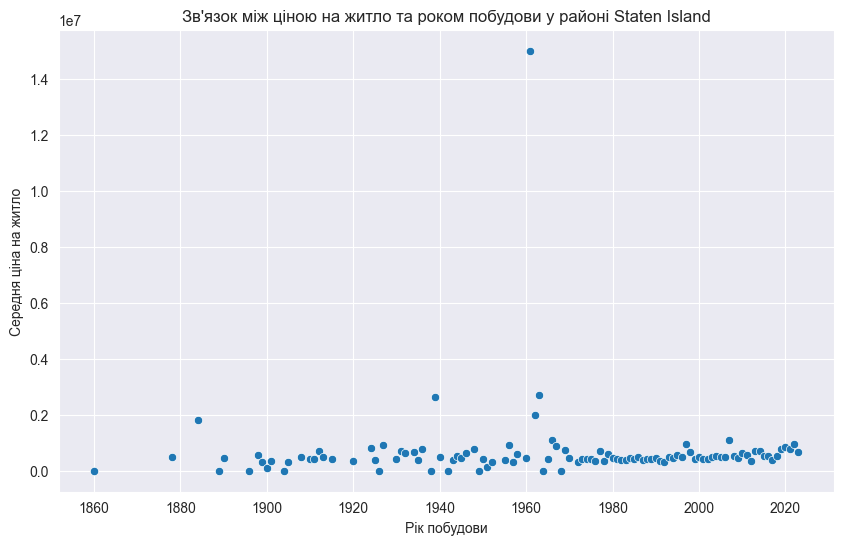

In [7]:
for data, name in zip(neighborhood_data, neighborhood_names):
    grouped_data = data.groupby('YEAR BUILT')['SALE PRICE'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sb.scatterplot(x='YEAR BUILT', y='SALE PRICE', data=grouped_data)
    plt.title(f'Зв\'язок між ціною на житло та роком побудови у районі {name}')
    plt.xlabel('Рік побудови')
    plt.ylabel('Середня ціна на житло')
    plt.show()

Можемо бачити що старіше житло знецінюється в Brooklyn та Staten Island та дорожче за нове у Manhattan 

Порівняння кількості проданих одиниць житла за між 2022 та 2023 роками

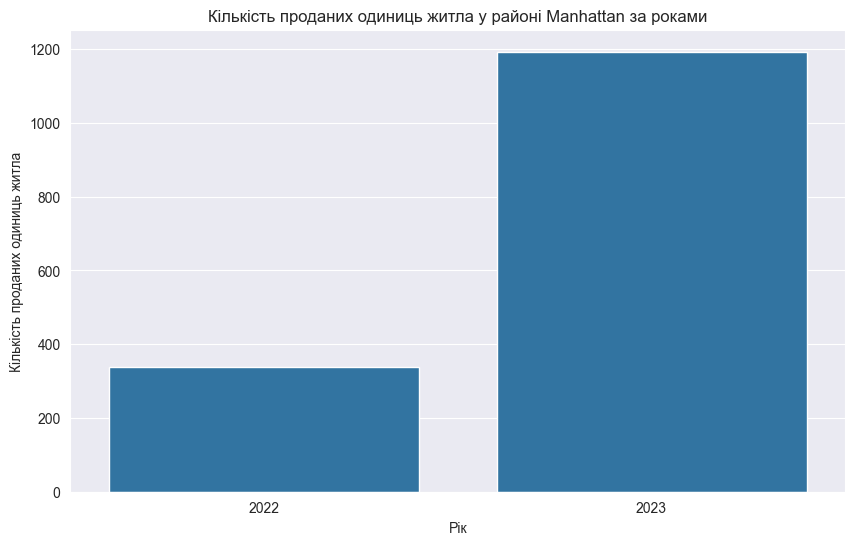

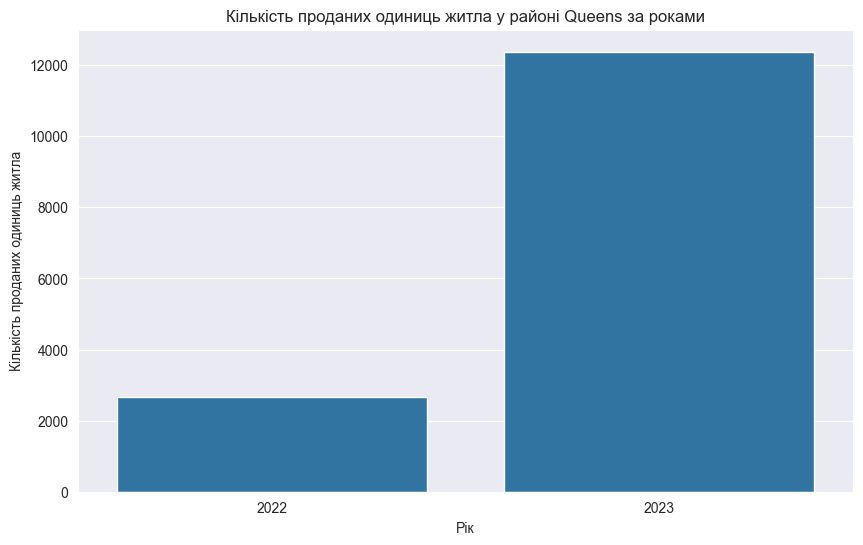

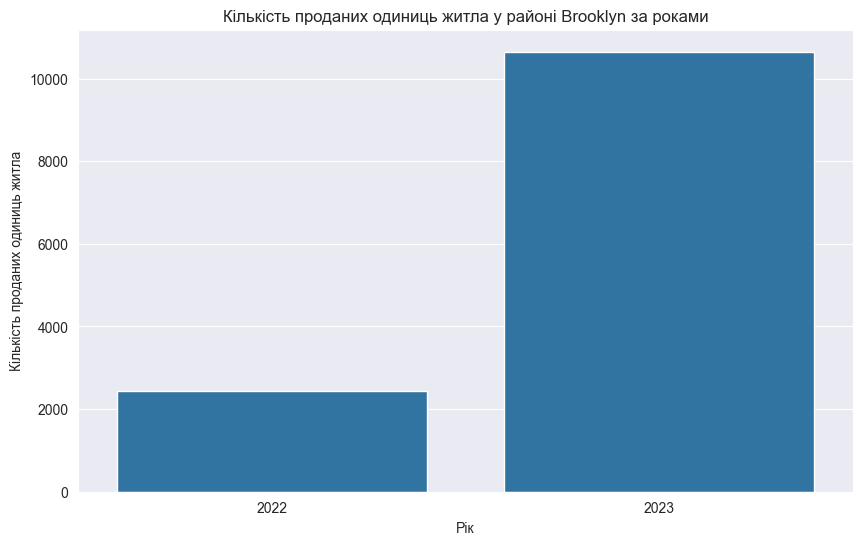

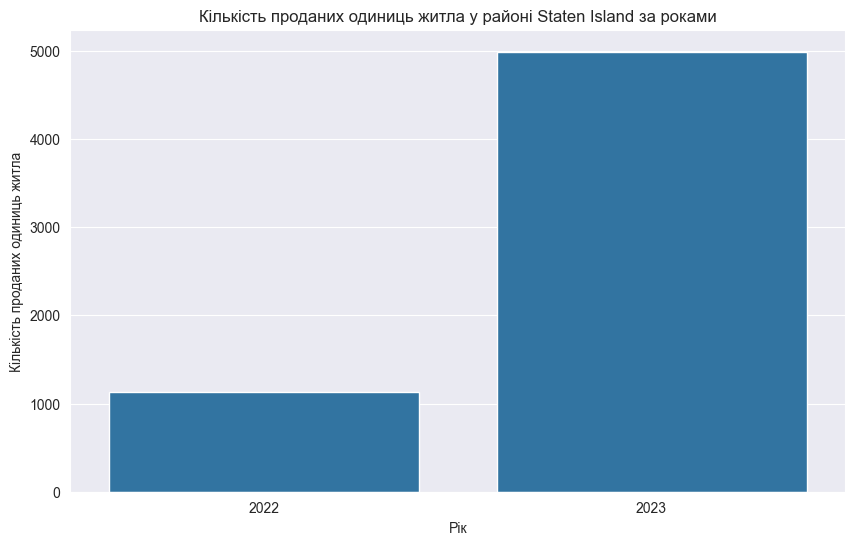

In [8]:
for data, name in zip(neighborhood_data, neighborhood_names):
    plt.figure(figsize=(10, 6))
    sb.countplot(x=data['SALE DATE'].dt.year)
    plt.title(f'Кількість проданих одиниць житла у районі {name} за роками')
    plt.xlabel('Рік')
    plt.ylabel('Кількість проданих одиниць житла')
    plt.show()

Порівняння розподілу цін на житло для різних типів будівель

Виходячи з цих графіків ринок житла відновився у 2023 після коронавірусу

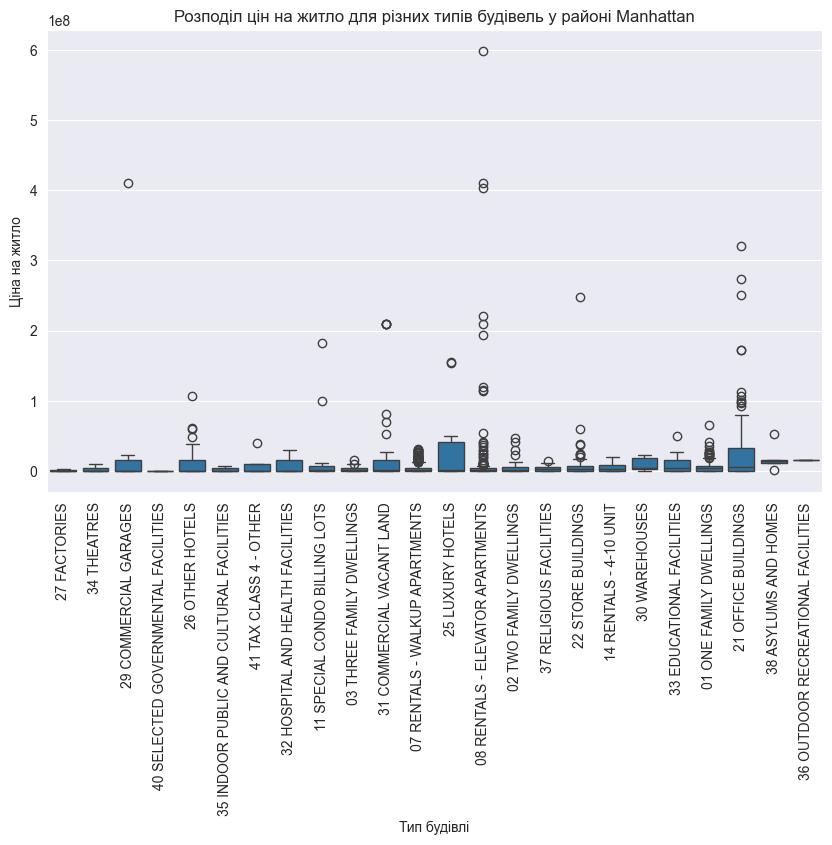

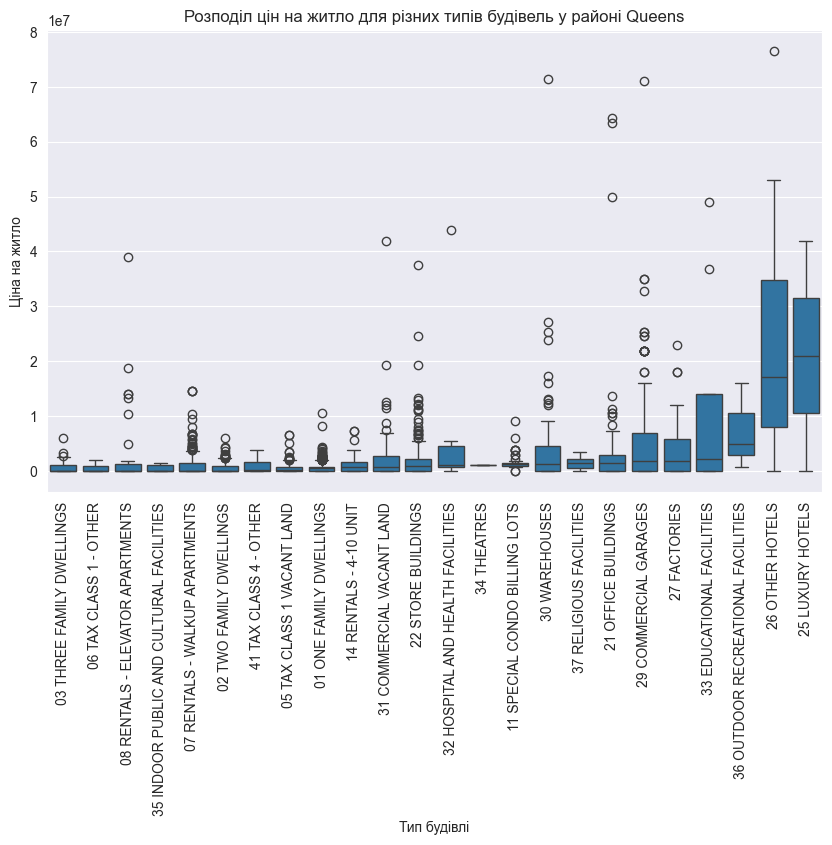

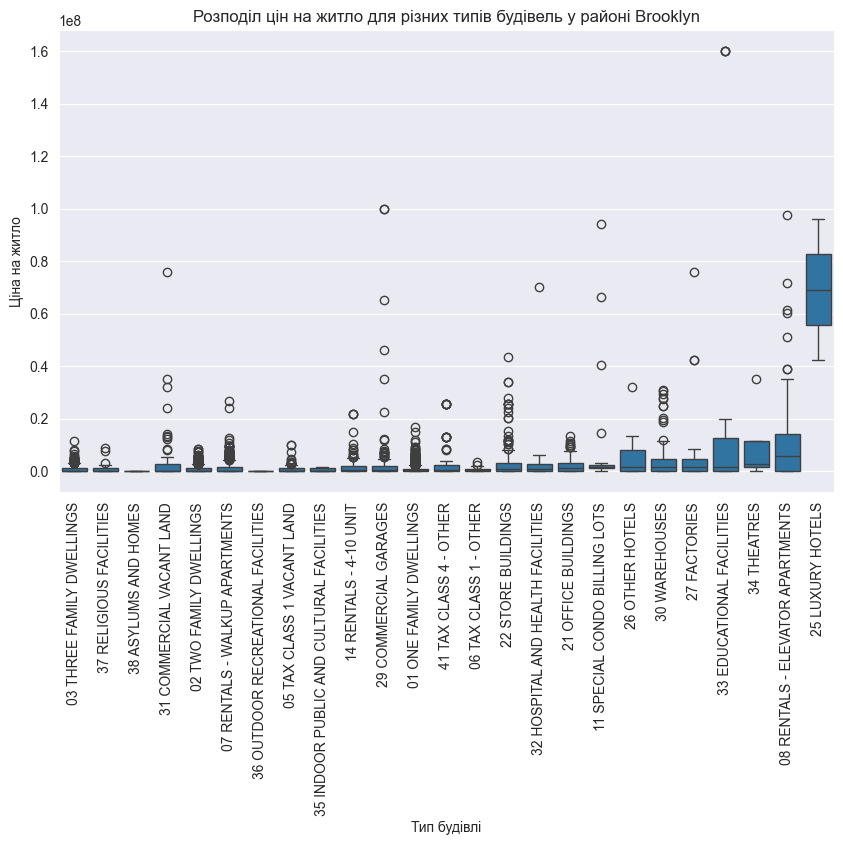

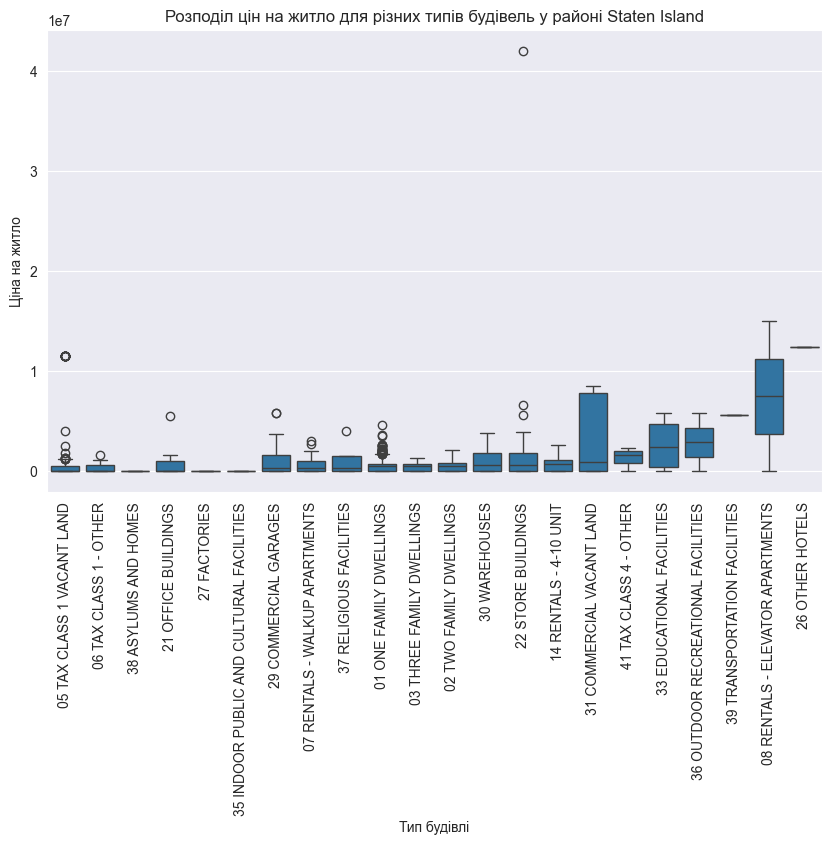

In [9]:
for data, name in zip(neighborhood_data, neighborhood_names):
    plt.figure(figsize=(10, 6))
    sb.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=data.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].median().sort_values().index)
    plt.xticks(rotation=90)
    plt.title(f'Розподіл цін на житло для різних типів будівель у районі {name}')
    plt.xlabel('Тип будівлі')
    plt.ylabel('Ціна на житло')
    plt.show()

Бачимо що по всіх районах найдорожчими є розкішні готелі

Середня ціна продажу за типами оподаткування

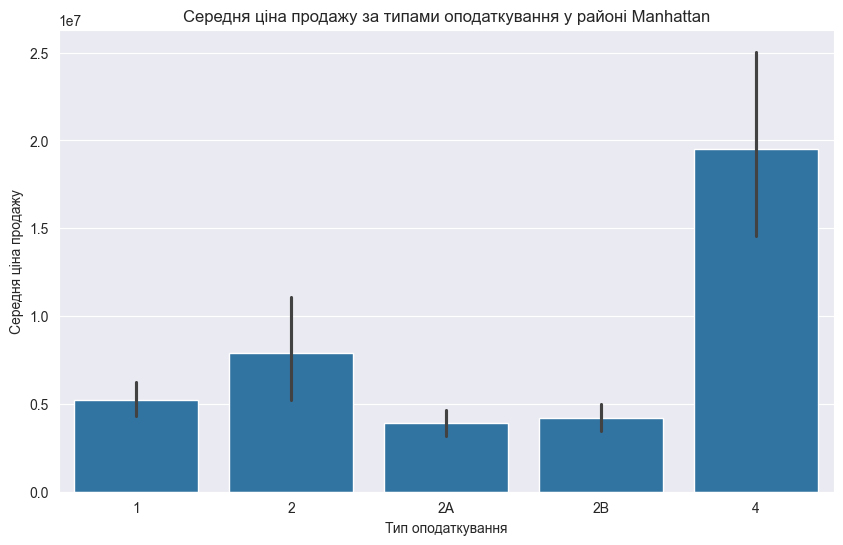

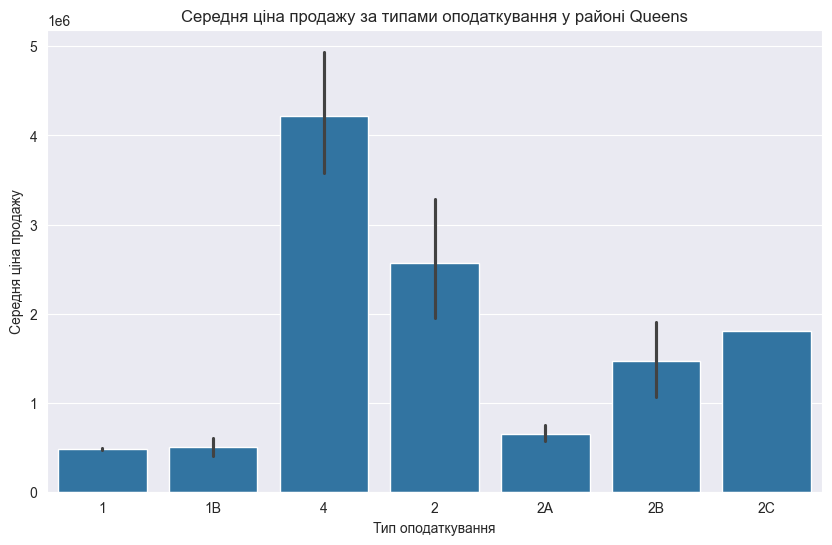

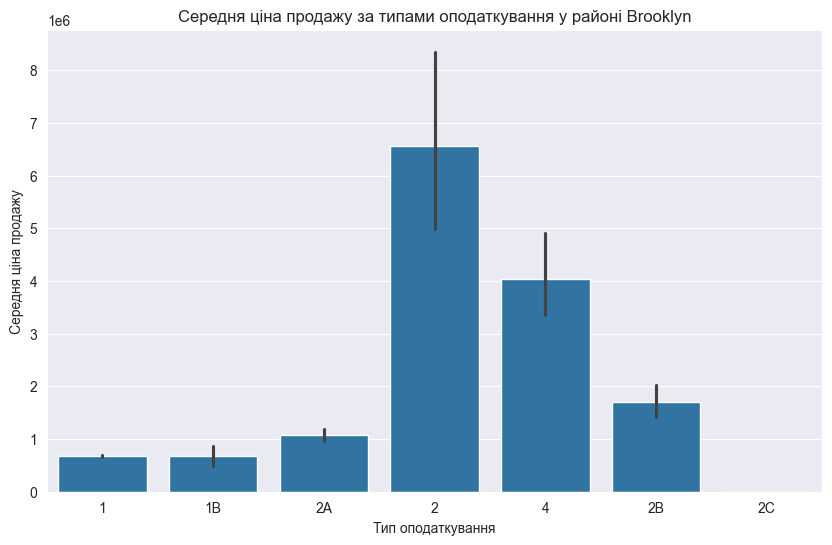

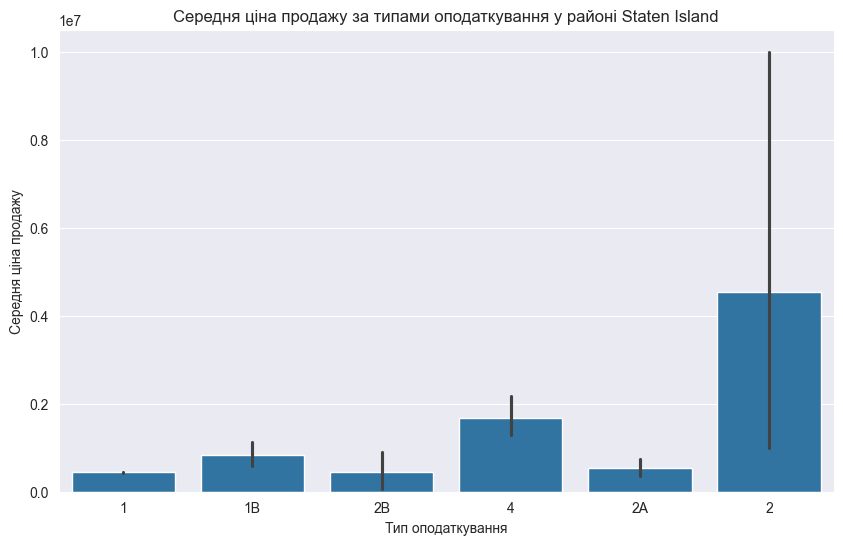

In [10]:
def avg_price_by_tax_class(data, title):
    plt.figure(figsize=(10, 6))
    sb.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=data)
    plt.title(title)
    plt.xlabel('Тип оподаткування')
    plt.ylabel('Середня ціна продажу')
    plt.show()

for data, name in zip(neighborhood_data, neighborhood_names):
    avg_price_by_tax_class(data, f'Середня ціна продажу за типами оподаткування у районі {name}')


Можемо зробити висновок що найдорожчим для покупця типом оподаткування є тип 4 та найдешевшим є тип 1 та 2А в залежності від району

In [11]:
params = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']

for param in params:
    print(f"Дисперсія для параметру '{param}':")
    for data, name in zip(neighborhood_data, neighborhood_names):
        variance = data[param].var()
        print(f"    Район {name}: {variance}")

Дисперсія для параметру 'SALE PRICE':
    Район Manhattan: 1159467231777791.5
    Район Queens: 4996435173950.723
    Район Brooklyn: 18118063467175.04
    Район Staten Island: 1057386146737.5298
Дисперсія для параметру 'LAND SQUARE FEET':
    Район Manhattan: 712044715.5073906
    Район Queens: 84863396.19040482
    Район Brooklyn: 706986011.9899739
    Район Staten Island: 14276195787.240534
Дисперсія для параметру 'GROSS SQUARE FEET':
    Район Manhattan: 20044626116.80699
    Район Queens: 81311123.54498258
    Район Brooklyn: 1315306938.5237675
    Район Staten Island: 16288292.896462342
Дисперсія для параметру 'YEAR BUILT':
    Район Manhattan: 1404.9754906529251
    Район Queens: 641.8092179639949
    Район Brooklyn: 830.5399174650438
    Район Staten Island: 1018.3046517954148


Ціна продажу (SALE PRICE):
- Район Manhattan має найвищу дисперсію ціни продажу, що свідчить про значний розкид цін на нерухомість у цьому районі.
- Staten Island має помірну дисперсію ціни продажу, що може вказувати на менший розкид цін порівняно з іншими районами.

Площа землі (LAND SQUARE FEET) та Загальна площа (GROSS SQUARE FEET):
- Staten Island має найвищу дисперсію як для площі землі, так і для загальної площі, що може свідчити про різноманіття розмірів ділянок та житла у цьому районі.
- Район Brooklyn має високу дисперсію площі землі, але низьку дисперсію загальної площі, що може вказувати на різницю у розмірах земельних ділянок, але схожі розміри будівель у цьому районі.

Рік побудови (YEAR BUILT):
- Район Manhattan має найнижчу дисперсію року побудови, що може вказувати на більш однорідний вік нерухомості у цьому районі.
- Staten Island та Brooklyn мають помірну дисперсію року побудови, що може свідчити про більш різноманітність будівельних епох та стилів у цих районах.